# LMC outputs
WORK IN PROGRESS
- In a majority of cartridges reconstructed (n = 25), we observe a clear difference between the inputs received by L1 and L3. The former receives a very uniform number of inputs from R1-6, but the latter demonstrates a bias towards inputs from R2 and R5, the pair with larger rhabdomeres
- In some of the more ventral cartridges, we couldn't find a cell with a large R2 and R5 bias, making L1 and L3 discrimination unclear. 

Can we:
- Describe the variable R2 and R5 bias of L3s
- Find an alternate measure to distinguish L1 and L3?
- Explain why cartridges in the ventral region have more similar L1s and L3s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap, subtype_cm

plt.rcdefaults()
plt.style.use('vis/lamina.mplstyle')

In [2]:
tp = '200914'
lamina_links = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_linkdf.pickle')
subtypes = np.unique([*lamina_links["pre_type"], *lamina_links["post_type"]])

all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]
ommatidia = ommatidia = np.unique(lamina_links['pre_om'])

In [3]:
df_lamina = pd.DataFrame(index=ommatidia, columns=all_ctype_labels).astype('Int64')

for om, row in df_lamina.iterrows():
    for c in all_ctype_labels:
        pre_t, post_t = c.split('->')
        # Cartridges on the posterior edge lack L4, so their counts for these connections are NaNed 
        if om in ['B0', 'E4', 'E5', 'E6', 'E7', 'D2', 'C1'] and post_t == 'LMC_4':
            df_lamina.loc[om, c] = None
        else:
            df_lamina.loc[om, c] = sum((lamina_links.pre_om == om) & (lamina_links.post_om == om) & 
                                       (lamina_links.pre_type == pre_t) & (lamina_links.post_type == post_t))

In [4]:
df_lamina.head()

,LMC_1->LMC_1,LMC_1->LMC_2,LMC_1->LMC_3,LMC_1->LMC_4,LMC_1->LMC_N,LMC_1->R1R4,LMC_1->R2R5,LMC_1->R3R6,LMC_1->R7,LMC_1->R7p,...,centri->LMC_4,centri->LMC_N,centri->R1R4,centri->R2R5,centri->R3R6,centri->R7,centri->R7p,centri->R8,centri->UNKNOWN,centri->centri
A0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,18,1,5,15,23,0,3
A1,0,0,0,0,0,0,0,0,0,0,...,4,1,2,14,1,1,22,13,0,1
A2,0,0,0,0,0,0,0,0,0,0,...,4,0,0,8,0,0,15,11,0,0
A3,0,0,0,0,0,0,0,0,0,0,...,3,0,0,19,0,7,32,26,0,4
A4,0,0,0,0,0,0,0,0,0,0,...,11,1,1,28,0,18,27,15,0,5


## L1 and L3: outputs in the lamina
- L1 is found to be presynaptic in 10 lamina cartridges
- L3 typically forms no presynaptic connections in the lamina; in cartridges where L1 and L3 have a similar lack of R2 and R5 bias, only one of them will make presynaptic connections and was thus designated L1

In [5]:
l1_out = df_lamina.filter(regex='^LMC_1->')
l1_out = l1_out[(l1_out.sum()>0).index]

l3_out = df_lamina.filter(regex='^LMC_3->')
l3_out = l3_out[(l3_out.sum()>0).index]

22.0

Text(0.5, 1.0, 'Number of L1 lamina outputs')

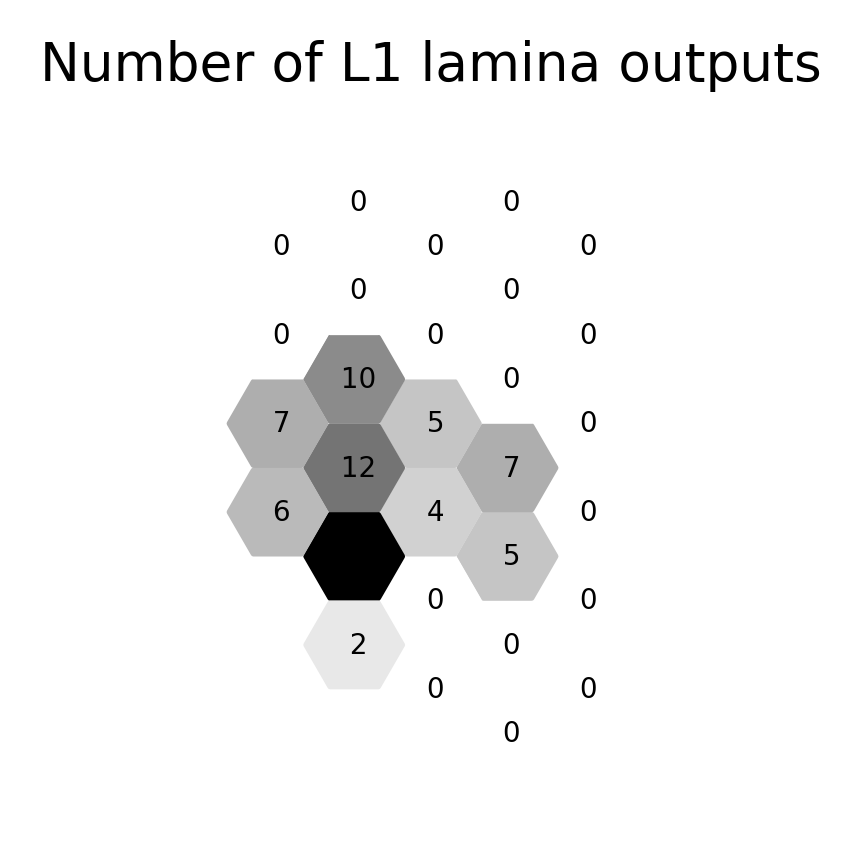

In [6]:
fig, ax = plt.subplots(1)
cm = plt.cm.get_cmap('binary')

max_val = l1_out.sum(axis=1).max()
display(max_val)
node_data = {o: {'colour': cm(l1_out.loc[o].sum()/max_val),
                'label': f"{l1_out.loc[o].sum(): .0f}"
                } for o in ommatidia}
hexplot(node_data=node_data, ax=ax)
ax.set_title('Number of L1 lamina outputs')

In [7]:
# fig, ax = plt.subplots(1)
# cm = plt.cm.get_cmap('binary')

# max_val = l3_out.sum(axis=1).max()
# display(max_val)
# node_data = {o: {'colour': cm(l3_out.loc[o].sum()/max_val),
#                 'label': f"{l3_out.loc[o].sum(): .0f}"
#                 } for o in ommatidia}
# hexplot(node_data=node_data, ax=ax)
# ax.set_title('Number of L3 outputs')

# plt.show()

## L1 and L3: inputs received in the lamina

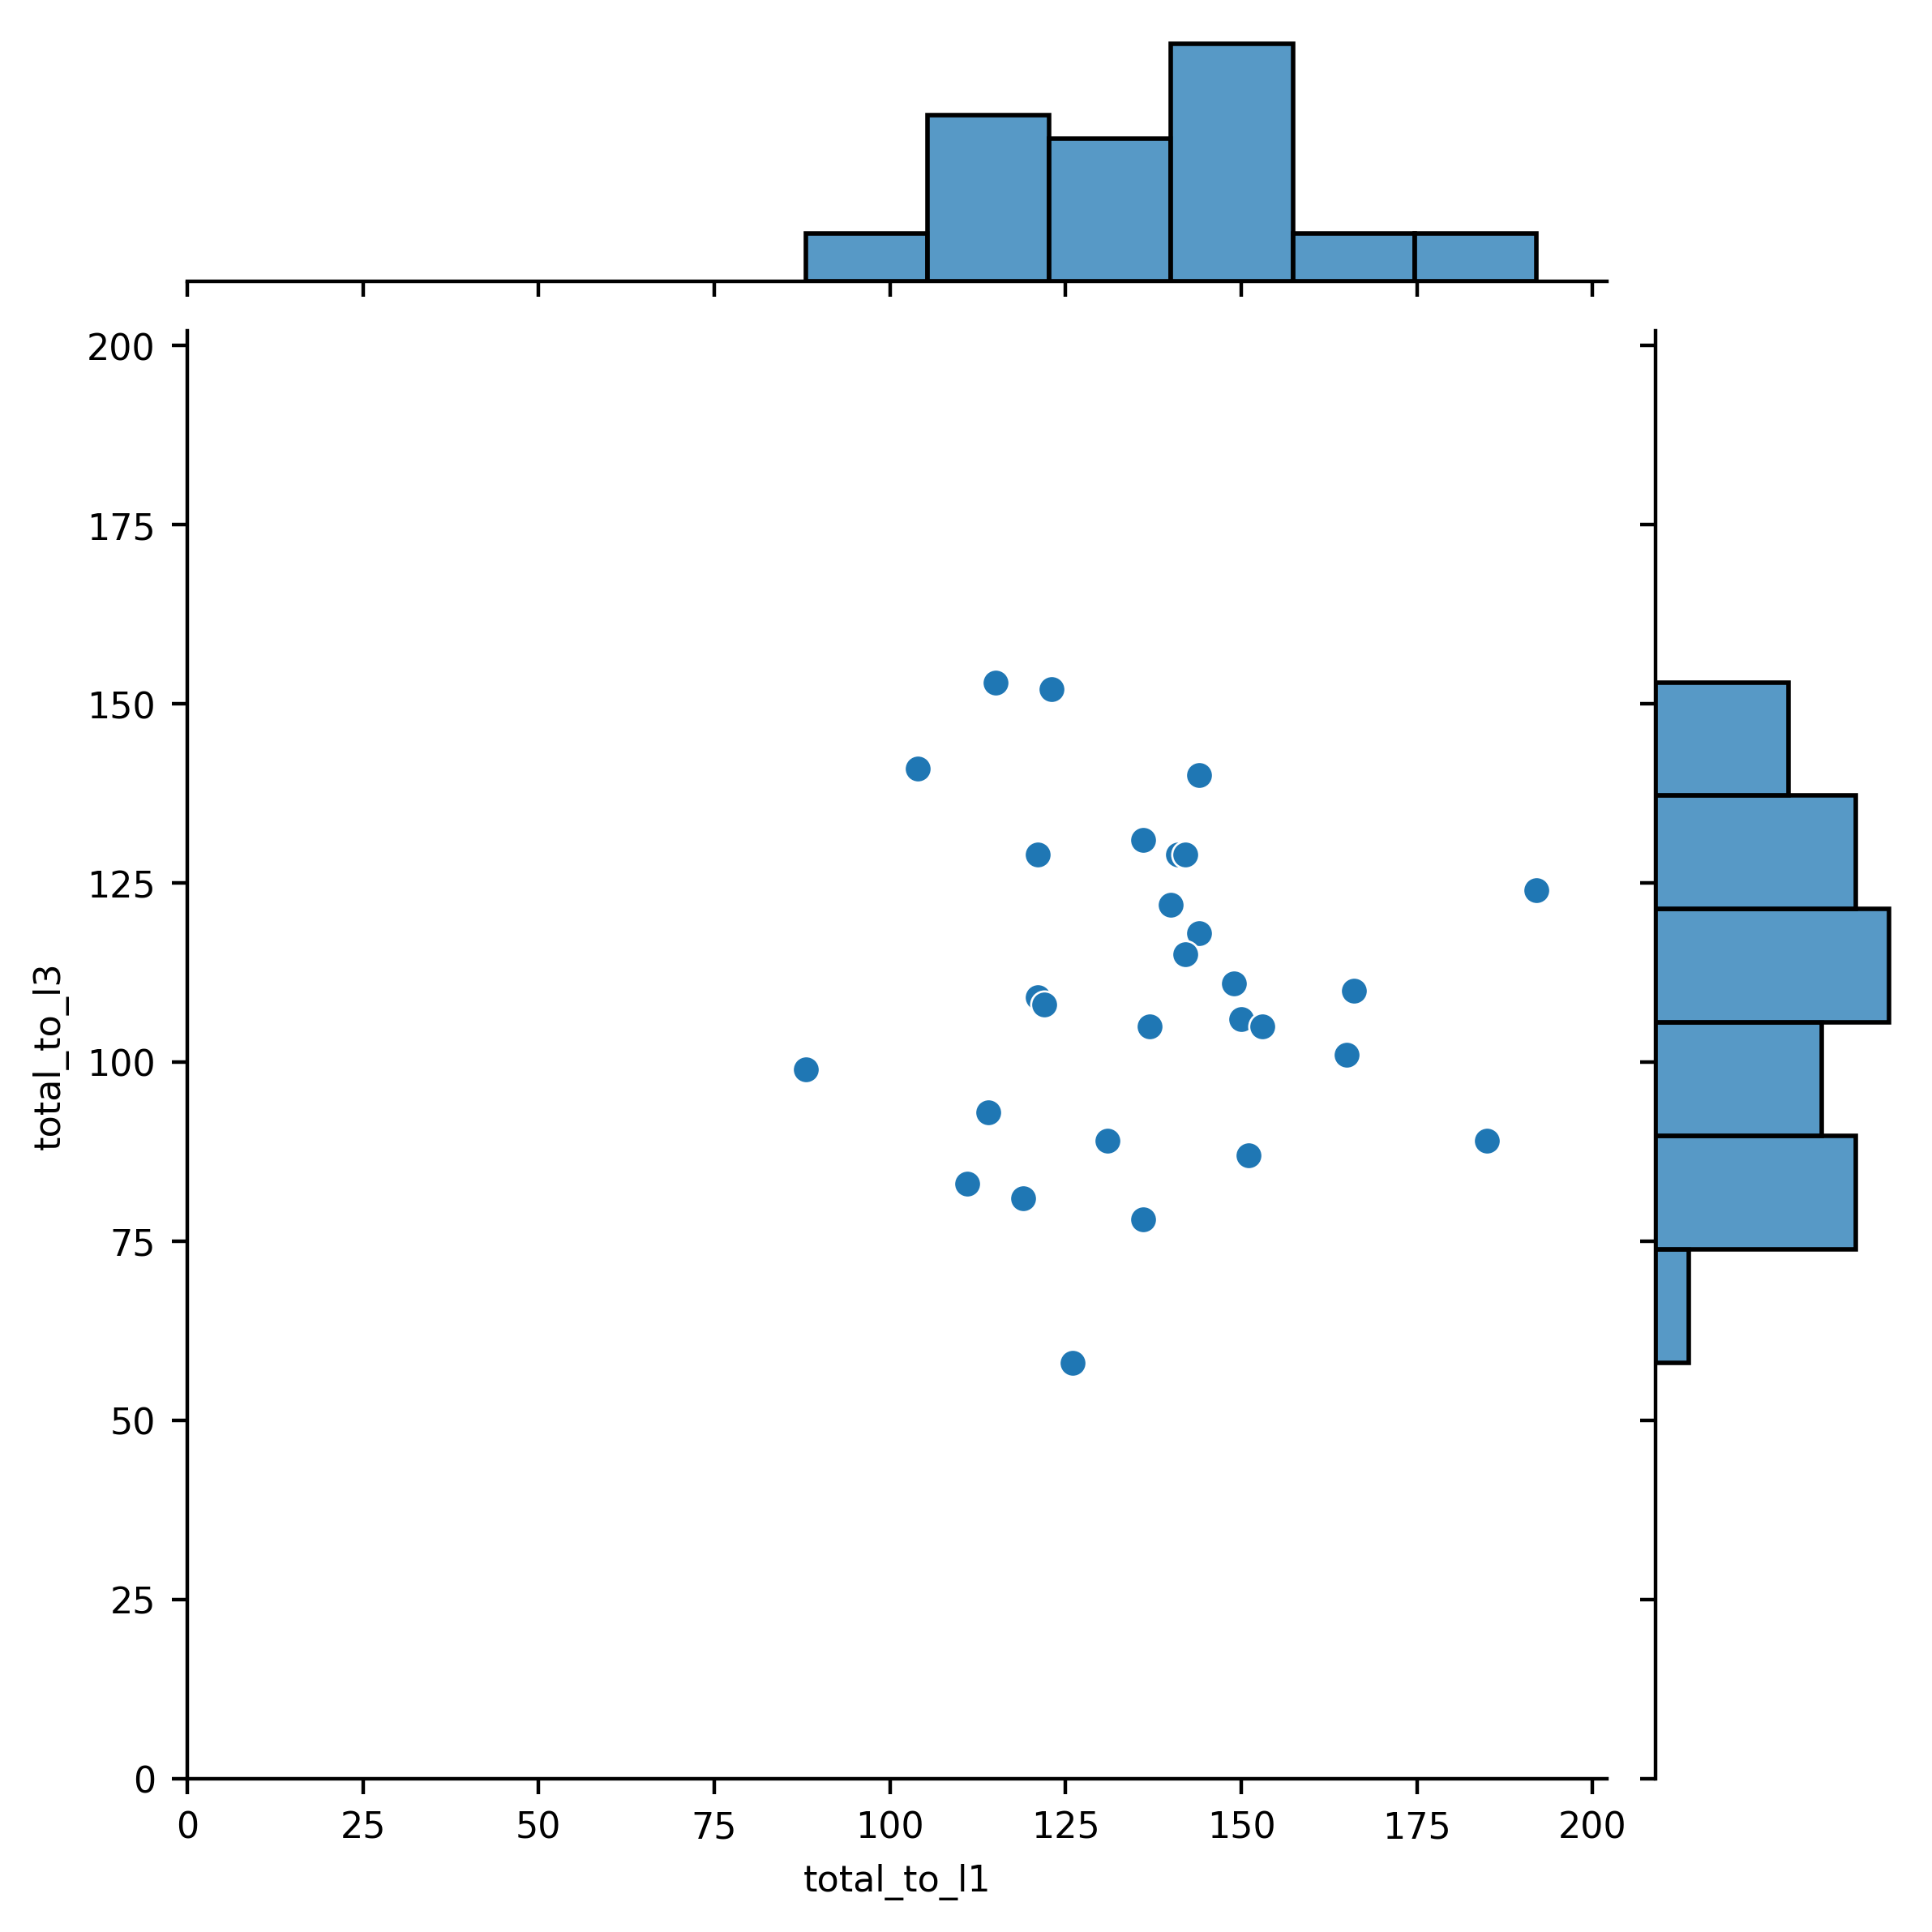

In [8]:
l1l3_inputs = pd.DataFrame({'total_to_l1': df_lamina.filter(regex='->LMC_1$').sum(axis=1), 
                            'total_to_l3': df_lamina.filter(regex='->LMC_3$').sum(axis=1)}).astype(int)

max_val = l1l3_inputs.max().max()
g = sns.JointGrid(x='total_to_l1', y='total_to_l3', data=l1l3_inputs, 
                  xlim=[0, max_val + 10], ylim=[0, max_val + 10])
g.plot(sns.scatterplot, sns.histplot)

## R2/R5 bias of L1 and L3

'Average R2/R5 bias'

'L1:  0.53 +-  0.11'

'L2:  0.64 +-  0.14'

'L3:  1.04 +-  0.37'

'L4:  1.87 +-  0.96'

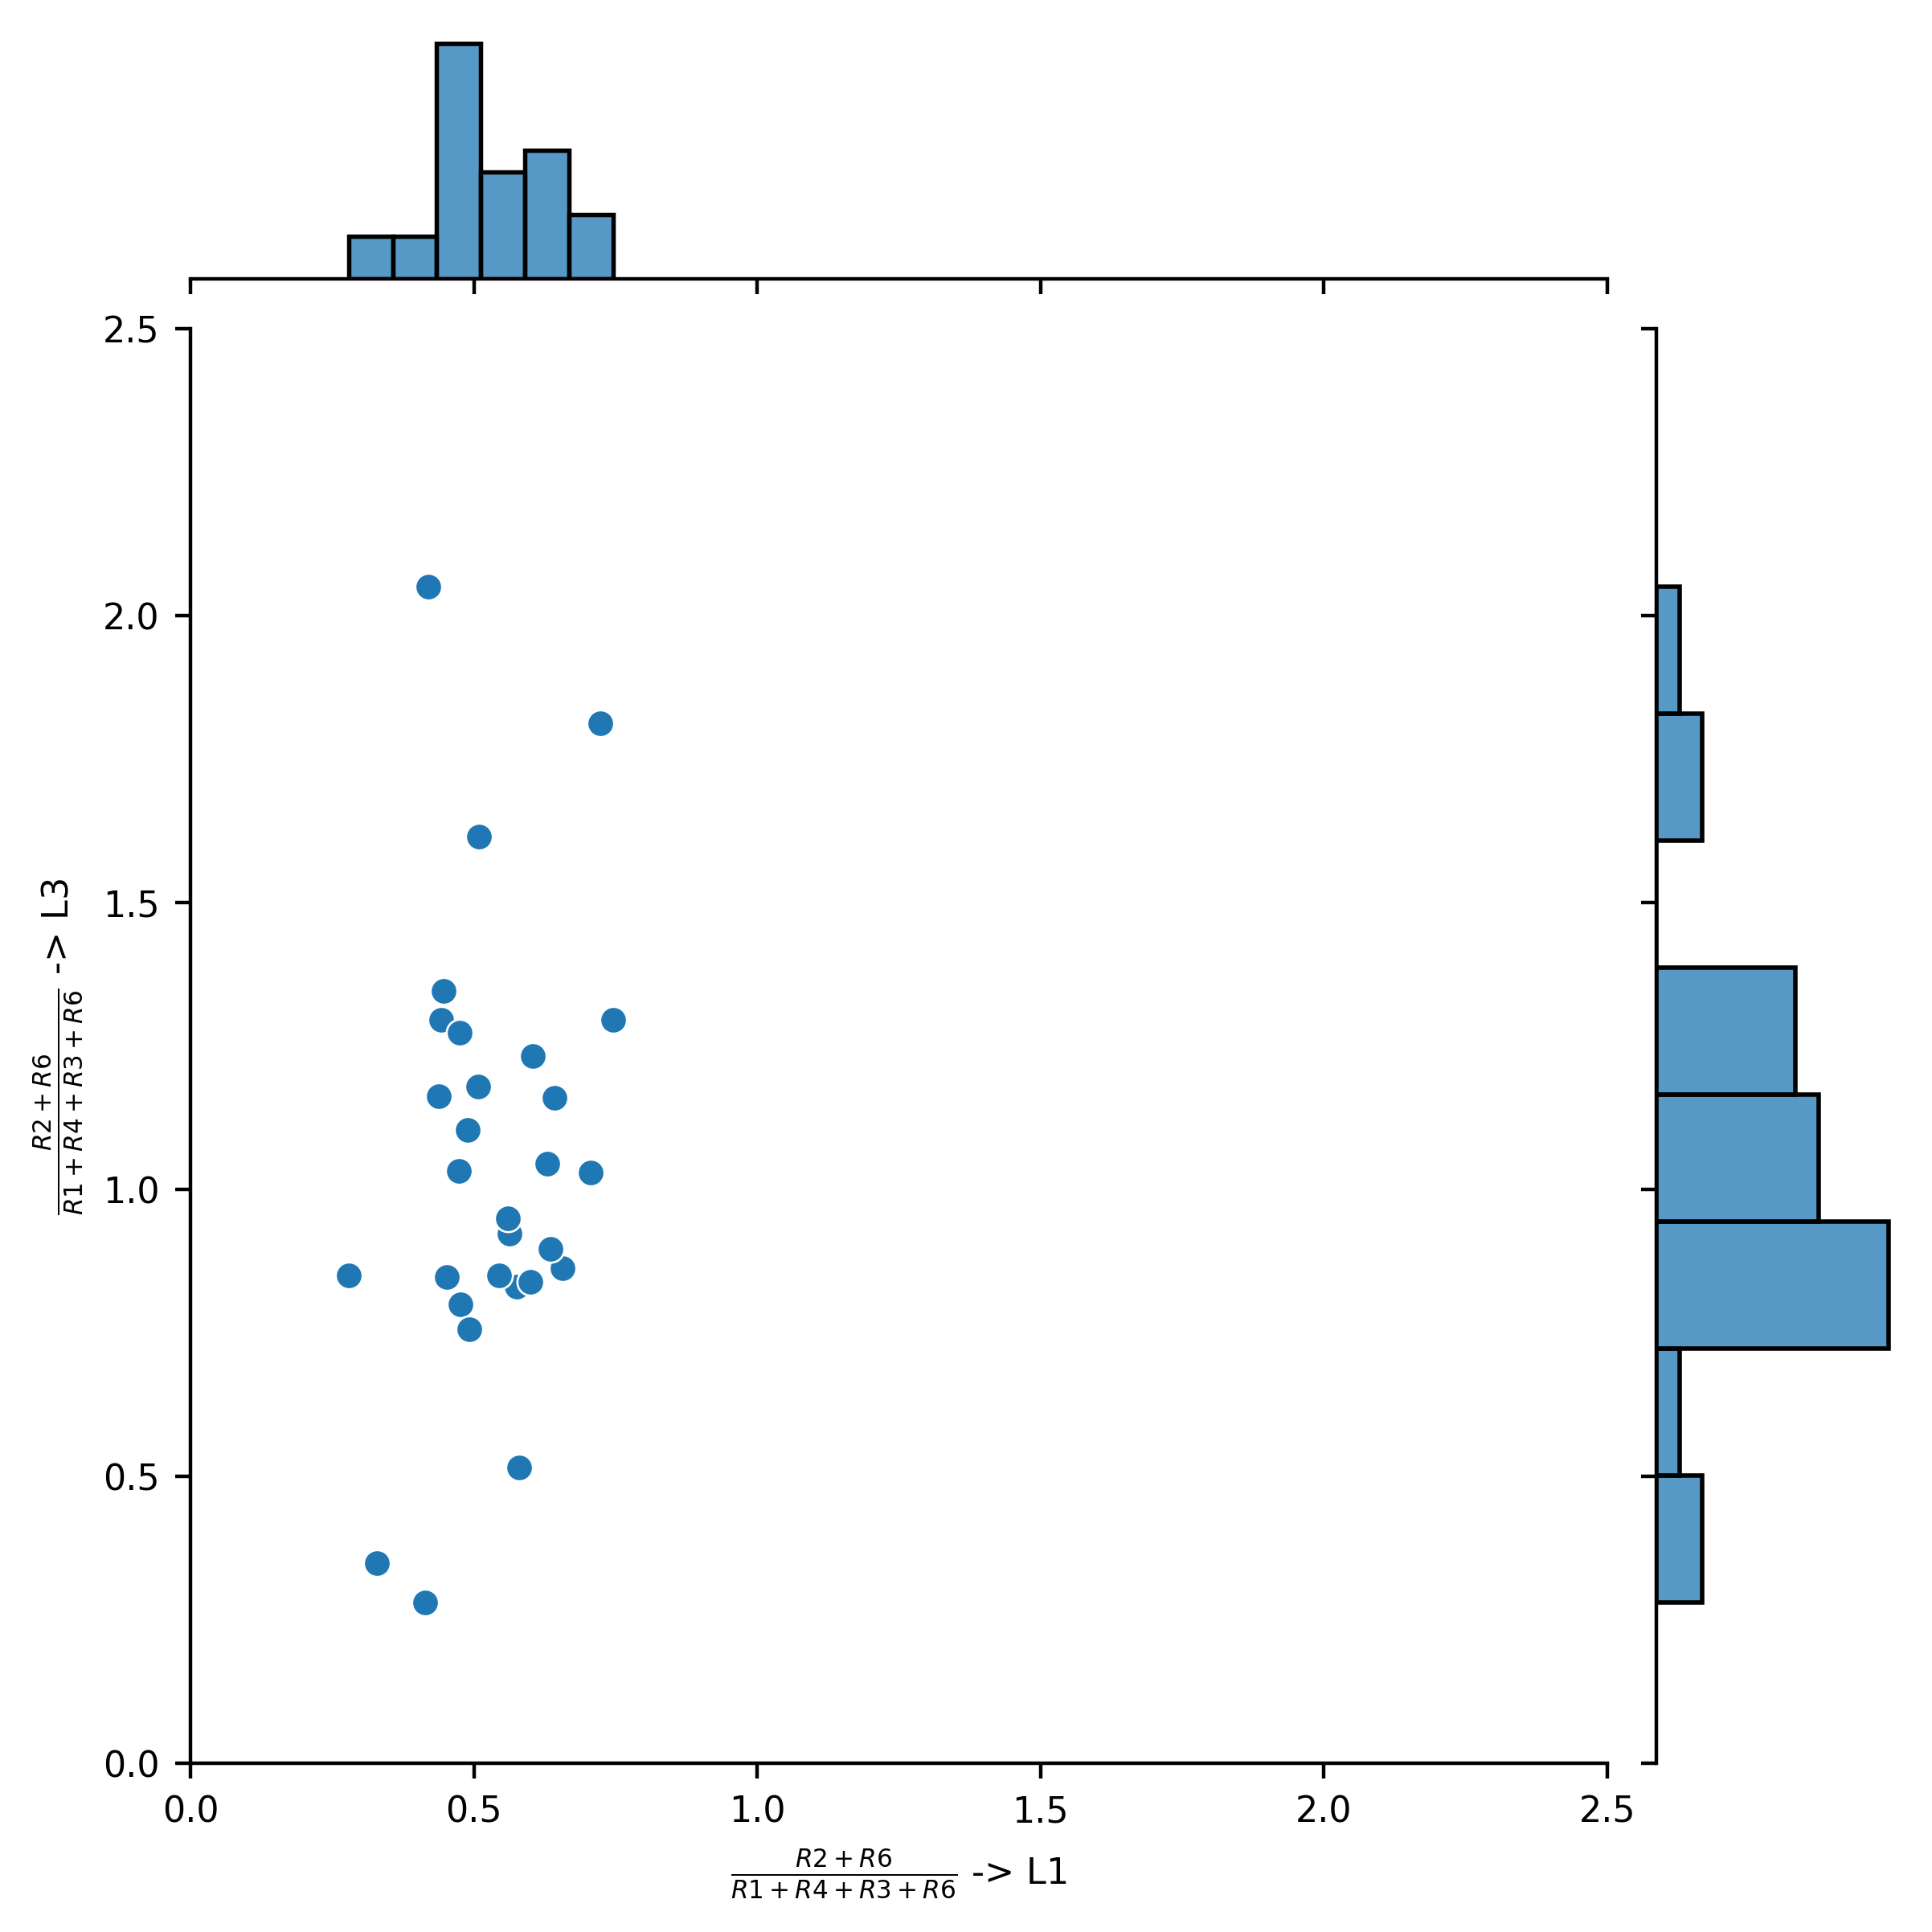

In [9]:
# Ratio between central and peripheral photoreceptor inputs to LMCs
ratio = dict.fromkeys(['LMC_1', 'LMC_2', 'LMC_3'])
for l in ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4']:
    ratio[l] = df_lamina[f'R2R5->{l}'].astype(float) / (df_lamina[f'R1R4->{l}'] + df_lamina[f'R3R6->{l}']).astype(float)
ratio_df = pd.DataFrame(data=ratio, index=ommatidia).rename(columns={'LMC_1': 'l1_bias', 
                                                                     'LMC_2': 'l2_bias', 
                                                                     'LMC_3': 'l3_bias',
                                                                     'LMC_4': 'l4_bias'})


max_val = ratio_df.max().max()
g = sns.JointGrid(x='l1_bias', y='l3_bias', data=ratio_df, 
                  xlim=[0, 2.5], ylim=[0, 2.5])
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$\frac{R2 + R6}{R1 + R4 + R3 + R6}$ -> L1')
g.ax_joint.set_ylabel(r'$\frac{R2 + R6}{R1 + R4 + R3 + R6}$ -> L3')


display(f"Average R2/R5 bias")
display(f"L1: {ratio_df['l1_bias'].mean(): .2f} +- {ratio_df['l1_bias'].std(ddof=0): .2f}")
display(f"L2: {ratio_df['l2_bias'].mean(): .2f} +- {ratio_df['l2_bias'].std(ddof=0): .2f}")
display(f"L3: {ratio_df['l3_bias'].mean(): .2f} +- {ratio_df['l3_bias'].std(ddof=0): .2f}")
display(f"L4: {ratio_df['l4_bias'].mean(): .2f} +- {ratio_df['l4_bias'].std(ddof=0): .2f}")

Text(0.5, 1.0, 'R2R5 input bias (L1)')

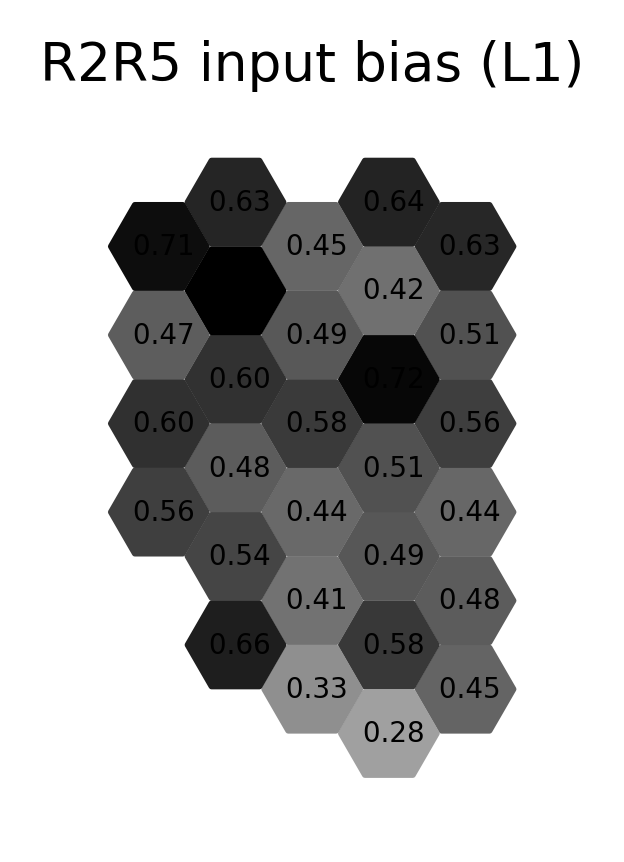

In [123]:
fig, ax = plt.subplots(1)
bias_max = ratio_df[]

cm = plt.cm.get_cmap('binary')
ratios_normed = ratio_df['l1_bias'] / ratio_df['l1_bias'].max() 

node_data = {o: {'colour': cm(r),
                'label': f"{ratio_df.loc[o, 'l1_bias']: .2f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)
ax.set_title('R2R5 input bias (L1)')



Text(0.5, 1.0, 'R2R5 input bias (L3)')

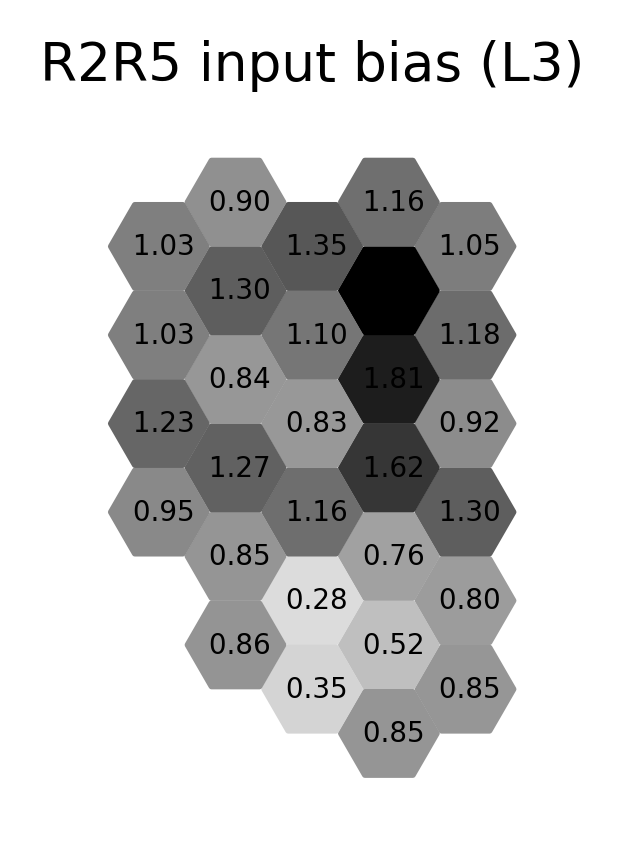

In [122]:
fig, ax = plt.subplots(1)

cm = plt.cm.get_cmap('binary')
ratios_normed = ratio_df['l3_bias']/ratio_df['l3_bias'].max()

node_data = {o: {'colour': cm(r),
                'label': f"{ratio_df.loc[o, 'l3_bias']: .2f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)
ax.set_title('R2R5 input bias (L3)')



<AxesSubplot:>

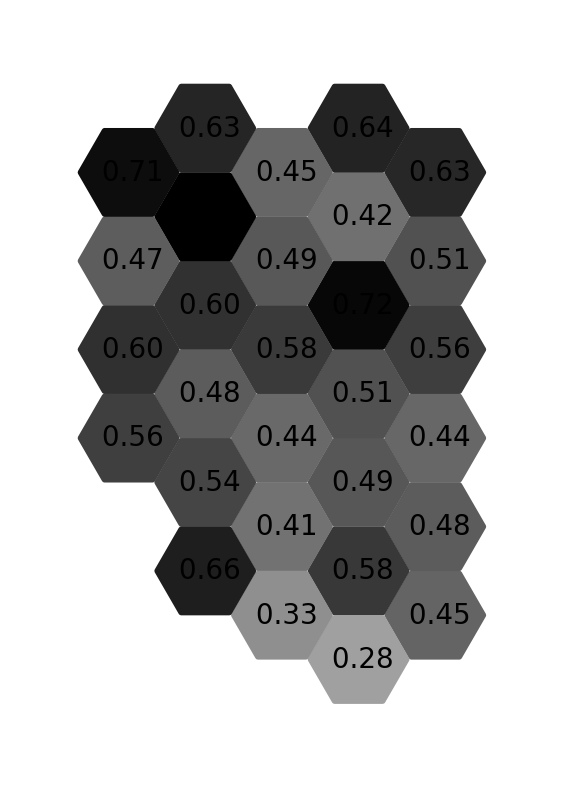

In [118]:
fig, ax = plt.subplots(1)

cm = plt.cm.get_cmap('binary')
ratios_normed = ratio_df['l1_bias']/ratio_df['l1_bias'].max()

node_data = {o: {'colour': cm(r),
                'label': f"{ratio_df.loc[o, 'l1_bias']: .2f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)



,LMC_2->LMC_1,LMC_2->LMC_2,LMC_2->LMC_3,LMC_2->LMC_4,LMC_2->R2R5,LMC_2->R7,LMC_2->R7p,LMC_2->R8,LMC_2->centri,LMC_N->LMC_1,...,centri->LMC_2,centri->LMC_3,centri->LMC_4,centri->R1R4,centri->R2R5,centri->R3R6,centri->R7,centri->R7p,centri->R8,centri->centri
l1_bias,0.154690,-0.244550,0.131116,-0.171688,-0.201637,0.004672,-0.421078,-0.400889,0.182137,-0.060936,...,0.021948,0.036049,0.090063,0.039375,0.250738,0.148767,0.358409,-0.157668,-0.278364,-0.106627
l2_bias,0.115818,-0.158735,-0.064658,0.009828,0.093268,0.475831,-0.271571,-0.339642,0.129801,0.065867,...,0.410533,0.090804,0.184389,0.098459,0.219541,0.140338,0.517072,-0.065702,-0.212865,0.161442
l3_bias,0.413913,-0.025748,0.235062,0.294707,0.106024,0.238904,-0.152088,-0.295867,-0.200879,0.072654,...,0.022968,0.334454,0.375869,-0.232256,0.092623,0.061258,0.365761,-0.263513,-0.531052,-0.015844
l4_bias,0.000589,0.030279,-0.132264,-0.035483,0.332202,0.258400,-0.176231,-0.105156,-0.154743,-0.027928,...,-0.138813,-0.263835,0.220215,-0.040486,-0.055029,0.079671,0.146893,-0.163481,-0.460683,-0.228428


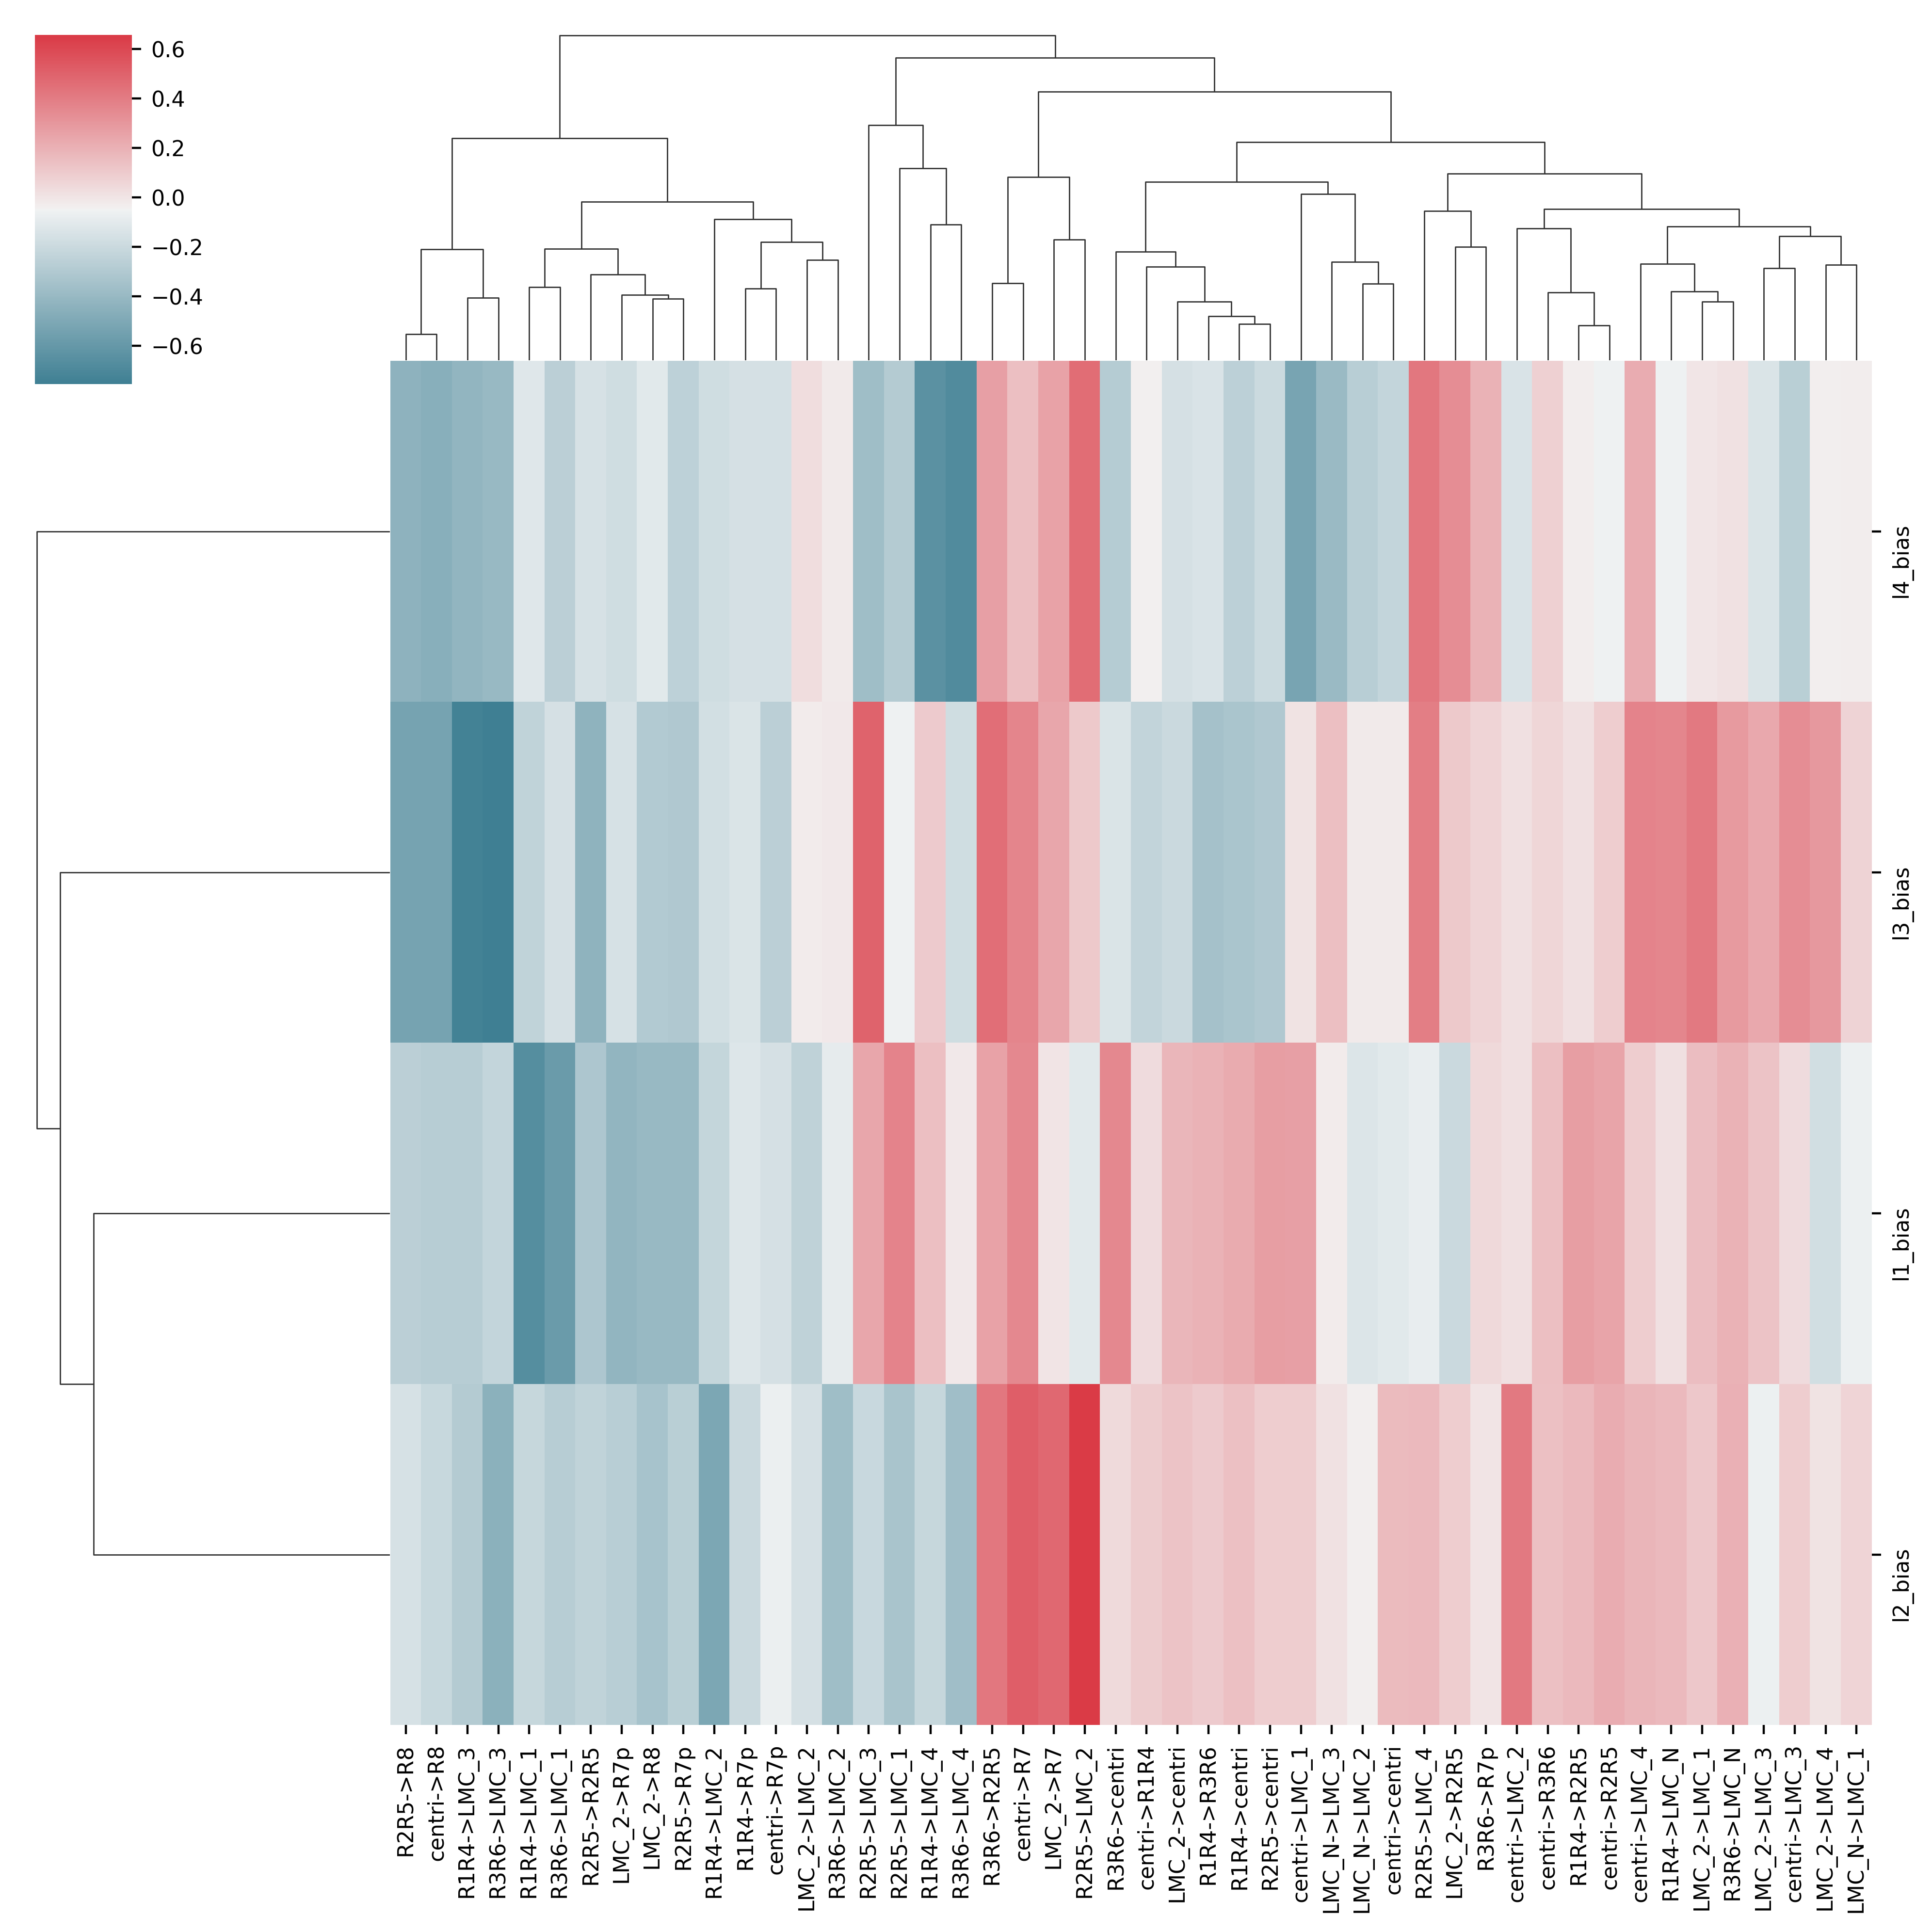

In [119]:
corr = pd.concat([ratio_df, df_lamina], axis='columns').corr()
corr = corr.filter(regex='l[1234]_bias', axis=0).filter(regex='->', axis=1).dropna(axis=1)
corr = corr.loc[:, (k for k, v in df_lamina.mean(axis=0).items() if v >= 1.0)]
display(corr)
#l3_bias_corr
cmap = sns.diverging_palette(220, 10, as_cmap=True, center='light')
sns.clustermap(corr, cmap=cmap)

<AxesSubplot:>

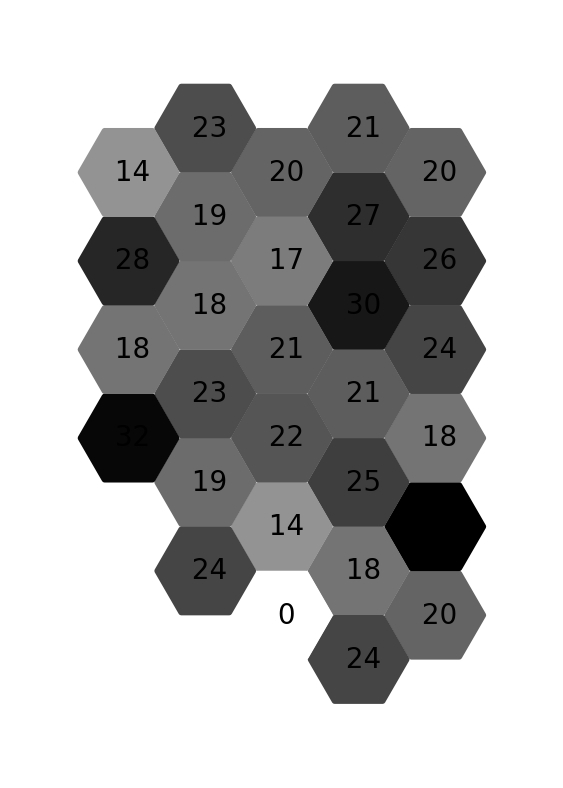

In [107]:
fig, ax = plt.subplots(1)

cm = plt.cm.get_cmap('binary')
ratios_normed = df_lamina['LMC_2->LMC_1']/df_lamina['LMC_2->LMC_1'].max()

node_data = {o: {'colour': cm(r),
                'label': f"{df_lamina.loc[o, 'LMC_2->LMC_1']: .0f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)



A0     54.0
A1    113.0
A2     75.0
A3     73.0
A4     85.0
A5     63.0
B0     68.0
B1     64.0
B2     59.0
B3     74.0
B4     83.0
B5     80.0
B6     60.0
C1     37.0
C2     62.0
C3     74.0
C4     61.0
C5     69.0
C6     71.0
D2     48.0
D3     58.0
D4     82.0
D5     70.0
D6     51.0
D7     81.0
E4     67.0
E5     86.0
E6     63.0
E7     47.0
dtype: float64

<AxesSubplot:>

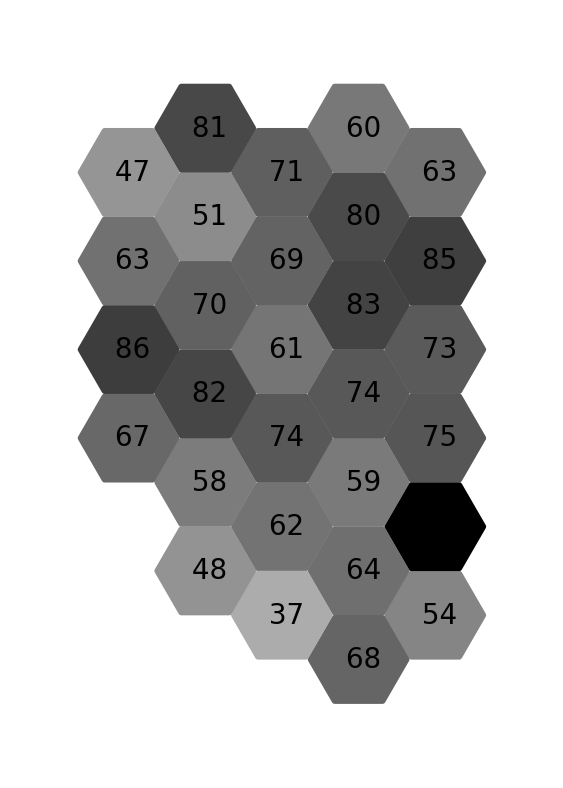

In [115]:
fig, ax = plt.subplots(1)

cm = plt.cm.get_cmap('binary')
l2_total_out = df_lamina.filter(regex='LMC_2->').sum(axis=1)
display(l2_total_out)
ratios_normed = l2_total_out.div(l2_total_out.max())

node_data = {o: {'colour': cm(r),
                'label': f"{l2_total_out.loc[o]: .0f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)



<AxesSubplot:>

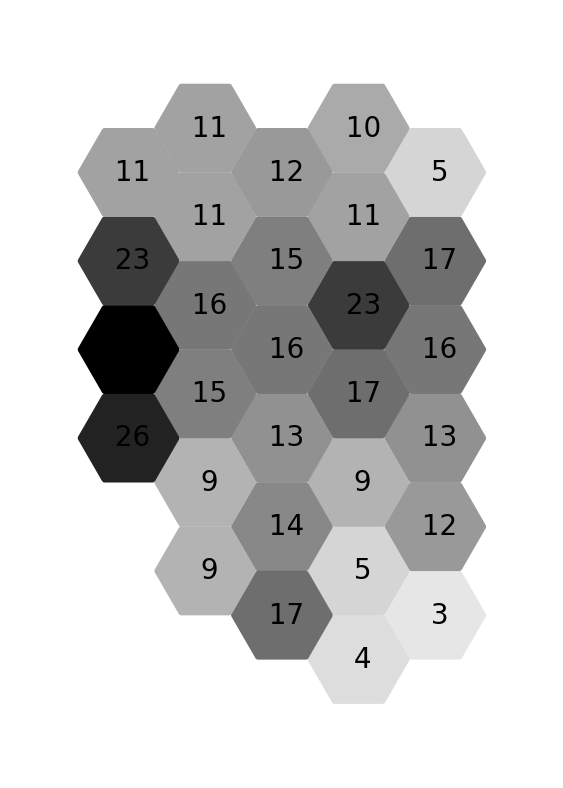

In [82]:
fig, ax = plt.subplots(1)

cm = plt.cm.get_cmap('binary')
ratios_normed = df_lamina['LMC_2->LMC_3']/df_lamina['LMC_2->LMC_3'].max()

node_data = {o: {'colour': cm(r),
                'label': f"{df_lamina.loc[o, 'LMC_2->LMC_3']: .0f}"
                } for o, r in ratios_normed.items()}
hexplot(node_data=node_data, ax=ax, scale_factor=0.1)



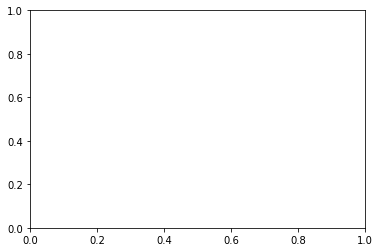

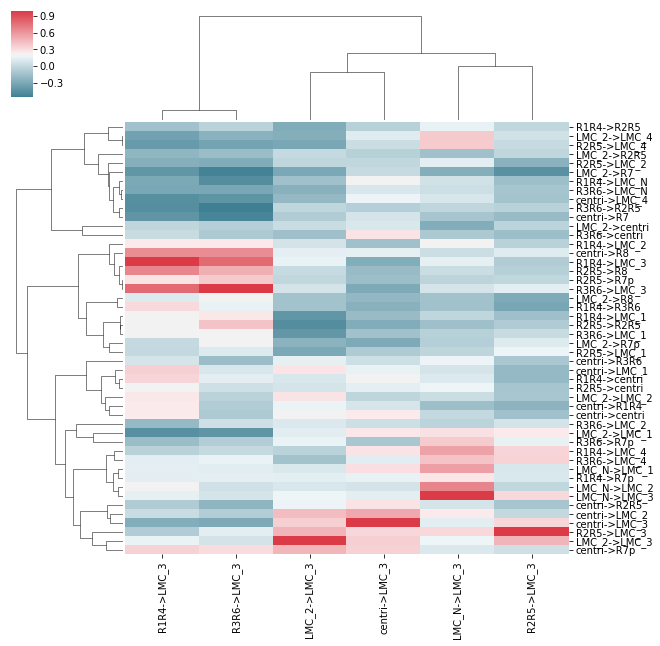

In [7]:
# Explore connections correlated with LMC_3 inputs
fig, ax = plt.subplots(1)

cx_corr = df.fillna(0.0).corr('pearson')
l3_cols = df.filter(regex='LMC_3$').columns
r8_cols = df.filter(regex='R8$').columns

cmap = sns.diverging_palette(220, 10, as_cmap=True, center='light')
sns.clustermap(cx_corr.loc[:, l3_cols], yticklabels=cx_corr.columns, metric='cosine', cmap=cmap)

In [8]:
l3_correlates = cx_corr.loc[:, l3_cols]
display(l3_correlates['R1R4->LMC_3'].sort_values())
#display(l3_correlates.filter(like='R2R5'))
display(l3_correlates['R3R6->LMC_3'].sort_values())



R3R6->R2R5       -0.461618
centri->LMC_4    -0.460023
LMC_2->LMC_1     -0.442569
centri->R7       -0.414659
LMC_2->R7        -0.409791
R2R5->LMC_4      -0.382529
LMC_2->LMC_4     -0.338538
R3R6->LMC_N      -0.304428
R1R4->LMC_N      -0.296130
centri->LMC_3    -0.269890
R2R5->LMC_2      -0.252532
LMC_2->R2R5      -0.206156
R3R6->LMC_2      -0.181337
R3R6->R7p        -0.167633
R1R4->R2R5       -0.133663
centri->R2R5     -0.074421
R2R5->LMC_3      -0.066913
R1R4->LMC_4      -0.036554
LMC_2->centri    -0.006651
R2R5->LMC_1       0.007848
LMC_2->R7p        0.012568
R3R6->centri      0.023815
centri->LMC_2     0.029517
centri->R3R6      0.076441
LMC_2->R8         0.120907
R3R6->LMC_4       0.139581
R1R4->R7p         0.146928
LMC_N->LMC_1      0.149954
LMC_N->LMC_3      0.156827
LMC_2->LMC_3      0.169708
R3R6->LMC_1       0.194799
R1R4->LMC_1       0.212487
LMC_N->LMC_2      0.226044
R2R5->centri      0.238241
R2R5->R2R5        0.246261
R1R4->LMC_2       0.253211
centri->R1R4      0.254708
c

R3R6->R2R5       -0.557902
LMC_2->R7        -0.532539
centri->R7       -0.516066
R1R4->LMC_N      -0.468538
centri->LMC_4    -0.421299
LMC_2->LMC_1     -0.414112
R2R5->LMC_4      -0.331968
R3R6->LMC_N      -0.302643
centri->LMC_3    -0.288562
R2R5->LMC_2      -0.277234
LMC_2->LMC_4     -0.239605
centri->R2R5     -0.214650
LMC_2->R2R5      -0.168415
centri->R3R6     -0.164778
centri->centri   -0.086783
R3R6->centri     -0.085735
centri->R1R4     -0.067611
R3R6->R7p        -0.063755
centri->LMC_2    -0.059603
LMC_2->centri    -0.058007
LMC_2->LMC_2     -0.033487
R1R4->R2R5       -0.028914
R1R4->LMC_4       0.010291
R3R6->LMC_2       0.050736
R2R5->centri      0.053448
LMC_N->LMC_2      0.061880
LMC_2->LMC_3      0.069422
LMC_N->LMC_3      0.079426
centri->LMC_1     0.094131
R2R5->LMC_1       0.119122
LMC_N->LMC_1      0.135491
R2R5->LMC_3       0.139748
R1R4->centri      0.146516
R1R4->R7p         0.149241
R1R4->R3R6        0.163042
R3R6->LMC_4       0.168146
LMC_2->R8         0.227866
L

Across the 3 retinotopic clusters
- R1R4/R3R6 -> L3 inputs are *positively* correlated with each other, in addition to centri->R8, R2R5->R8, and R2R5->R7p
- R1R4/R3R6 -> L3 inputs are *negatively* correlated with DRA associated connections: centri->R7, L2->R7,  
- 

A0    23
A1    13
A2    11
A3    26
A4    15
A5     8
B0    12
B1    19
B2    18
B3    11
B4    12
B5    12
B6    10
C1    21
C2    24
C3    18
C4    14
C5    12
C6    13
D2    14
D3    16
D4    17
D5    19
D6    13
D7    11
E4    17
E5    18
E6    11
E7     8
Name: centri->R8, dtype: Int64

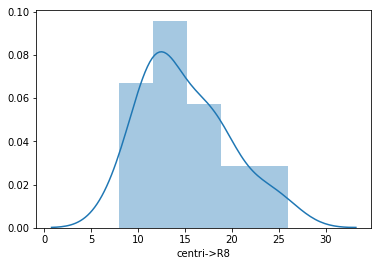

In [9]:
display(df_lamina['centri->R8'])
sns.distplot(df_lamina['centri->R8'].astype(int))

In [10]:


fig, ax = plt.subplots(1, 2, figsize=[20, 15])
cm = linear_cmap(int(df['centri->R8'].max()), max_colour='k')
nd = {om: {'colour': cm(df.loc[om, 'centri->R8']/df['centri->R8'].mean())} for om in ommatidia}
hexplot(nd, ax=ax[0])


cm = linear_cmap(int(df['R1R4->LMC_3'].max() * 2), max_colour='k')
nd = {om: {'colour': (cm(df.loc[om, 'R1R4->LMC_3'] + df.loc[om, 'R3R6->LMC_3'])/} for om in ommatidia}
hexplot(nd, ax=ax[1])

SyntaxError: invalid syntax (<ipython-input-10-ab484d442df0>, line 10)

In [ ]:
def lin_model_intercept0(x, y):
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y)
    return LinearRegression(fit_intercept=False).fit(x, y)

def plot_lin_fit(x, y, ax, plot_kwargs={}, scatter_kwargs={}):
    xpoints = np.arange(0, max(x.max(), y.max())).reshape(-1, 1)
    model = lin_model_intercept0(x, y)
    fitprops = f"R^2: {model.score(x.to_numpy().reshape(-1, 1), y): .2f}, coef: {model.coef_[0]: .2f}"

    ax.plot(xpoints, model.predict(xpoints), label=plot_kwargs.get('label', '') + ' \n' + fitprops, **plot_kwargs)
    ax.scatter(x,y, label=None, **scatter_kwargs)
    ax.legend()

In [ ]:
fig, ax = plt.subplots(2, 1)
plot_lin_fit(df[''])